Decision Tree Structure:
 |--- std_x <= 1.38
|   |--- mean_x <= 0.42
|   |   |--- mean_x <= 0.30
|   |   |   |--- class: no_hand_wash
|   |   |--- mean_x >  0.30
|   |   |   |--- class: hand_wash
|   |--- mean_x >  0.42
|   |   |--- class: no_hand_wash
|--- std_x >  1.38
|   |--- std_z <= 1.52
|   |   |--- mean_y <= -3.41
|   |   |   |--- std_x <= 3.56
|   |   |   |   |--- class: no_hand_wash
|   |   |   |--- std_x >  3.56
|   |   |   |   |--- class: hand_wash
|   |   |--- mean_y >  -3.41
|   |   |   |--- class: no_hand_wash
|   |--- std_z >  1.52
|   |   |--- mean_x <= -3.30
|   |   |   |--- class: no_hand_wash
|   |   |--- mean_x >  -3.30
|   |   |   |--- mean_z <= 5.90
|   |   |   |   |--- mean_x <= 3.60
|   |   |   |   |   |--- mean_z <= 0.38
|   |   |   |   |   |   |--- mean_y <= -1.00
|   |   |   |   |   |   |   |--- class: hand_wash
|   |   |   |   |   |   |--- mean_y >  -1.00
|   |   |   |   |   |   |   |--- class: no_hand_wash
|   |   |   |   |   |--- mean_z >  0.38
|   |   | 

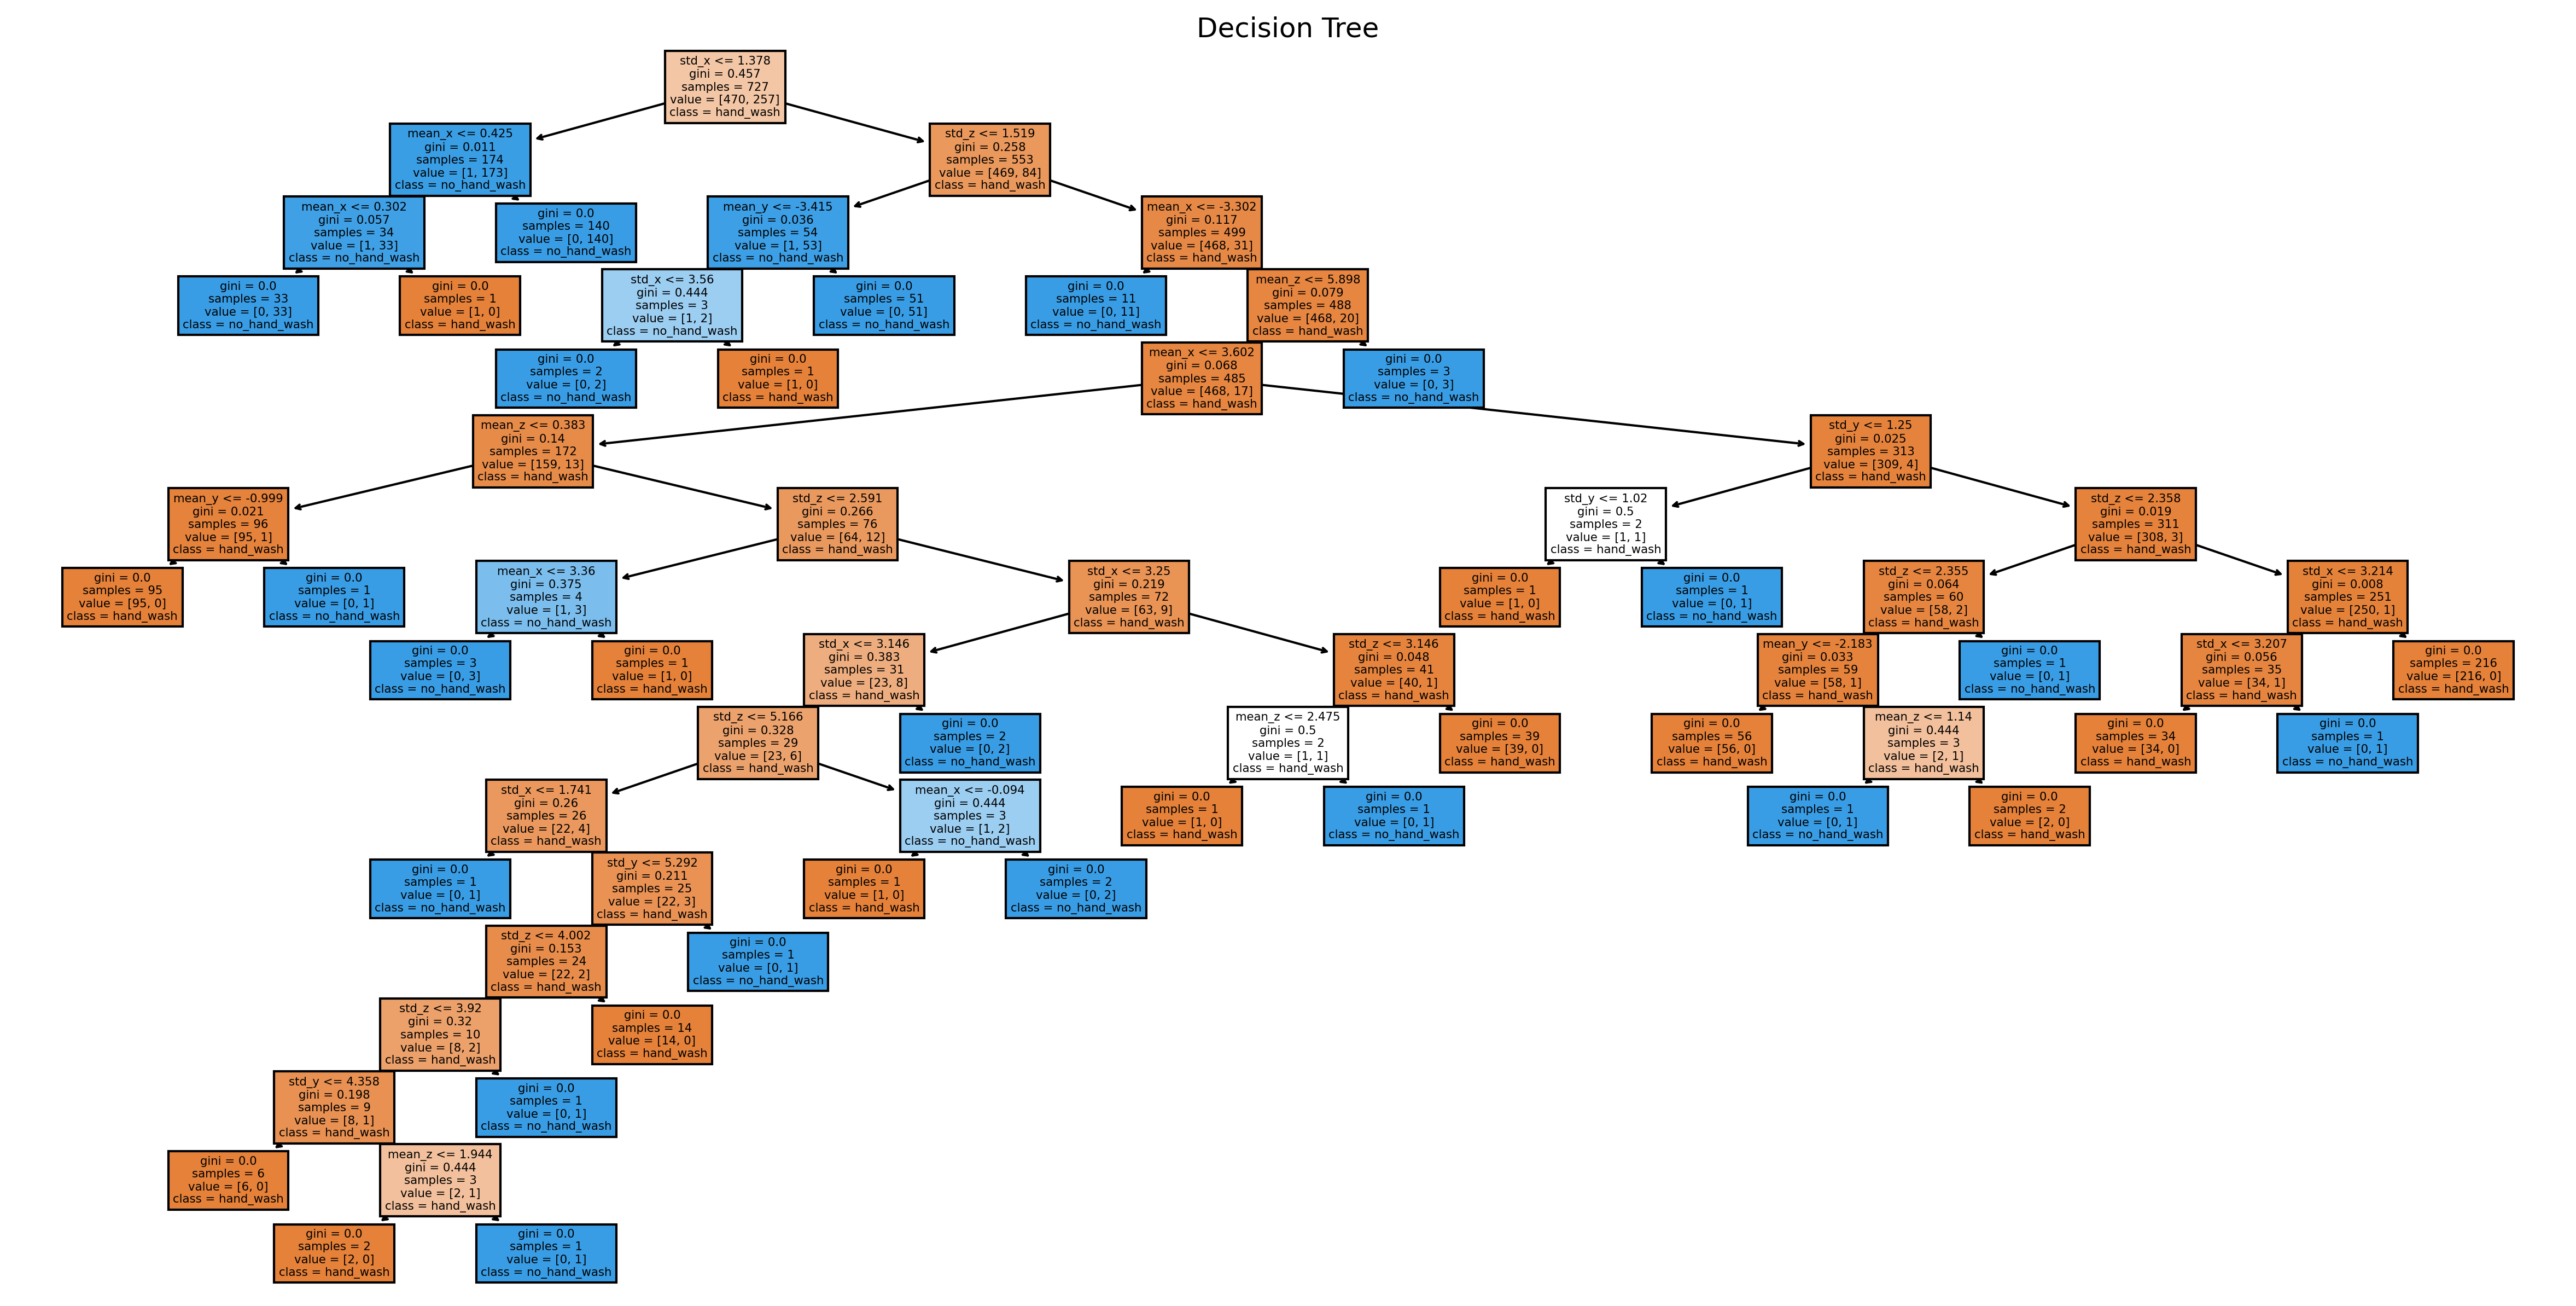

Accuracy of Classification: 96.70%
Confusion Matrix:
 [[120   5]
 [  1  56]]


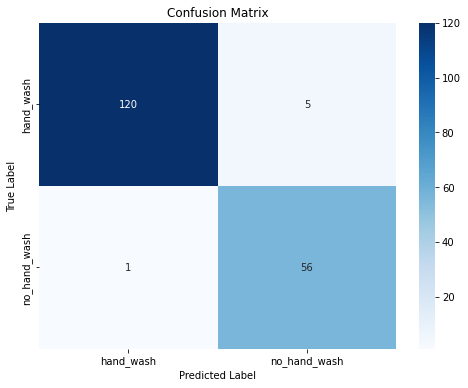


Classification Report:
               precision    recall  f1-score   support

   hand_wash       0.99      0.96      0.98       125
no_hand_wash       0.92      0.98      0.95        57

    accuracy                           0.97       182
   macro avg       0.95      0.97      0.96       182
weighted avg       0.97      0.97      0.97       182



In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('features.csv')

# Separate features and labels
X = data[['mean_x', 'std_x', 'mean_y', 'std_y', 'mean_z', 'std_z']]
y = data['Activity']

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree classifier
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Display the decision tree structure in text form
tree_rules = export_text(classifier, feature_names=['mean_x', 'std_x', 'mean_y', 'std_y', 'mean_z', 'std_z'])
print("Decision Tree Structure:\n", tree_rules)

# Plot the decision tree with higher resolution
plt.figure(figsize=(20, 10), dpi=300)  # Increase dpi for better resolution
plot_tree(classifier, feature_names=['mean_x', 'std_x', 'mean_y', 'std_y', 'mean_z', 'std_z'],
          class_names=classifier.classes_, filled=True)
plt.title("Decision Tree")
plt.show()

# Predict on the test set
y_pred = classifier.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Classification: {accuracy * 100:.2f}%")

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
print("Confusion Matrix:\n", conf_matrix)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classifier.classes_,
            yticklabels=classifier.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Optionally, print a classification report for additional metrics
report = classification_report(y_test, y_pred, target_names=classifier.classes_)
print("\nClassification Report:\n", report)
